
# Bài tập 0 - Tìm hiểu Decision Tree
Họ tên: Trần Như Cẩm Nguyên
MSSV: 22520004

# 2. Decision Tree trong sklearn

Cách dùng Decision Tree trong sklearn cho bài toán phân loại loài hoa.

In [ ]:
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris() # Load dữ liệu
X = iris.data # Design matrix
y = iris.target # Targets

In [ ]:
# Xem dữ liệu
import pandas as pd
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['label'] = pd.Series(iris.target_names[y], dtype='category')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Tách dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22520004)

In [ ]:
# Tạo mô hình Decision Tree cho phân loại
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Train mô hình
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

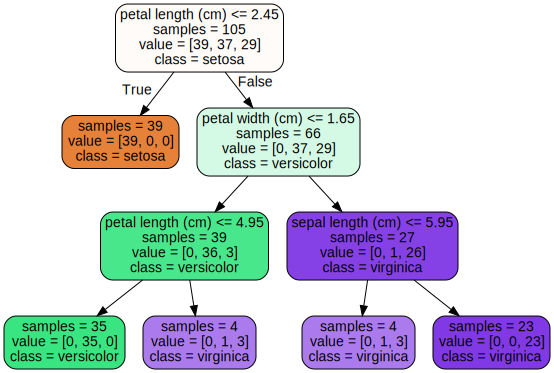

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='iris.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('iris.dot')

In [ ]:
# Cho mô hình dự đoán trên tập test
y_pred = model.predict(X_test)
print(y_pred)

[0 2 2 0 2 1 0 2 2 2 0 2 1 2 1 2 2 1 2 1 2 0 0 2 0 1 2 2 0 2 0 1 1 1 2 0 2
 1 2 2 1 1 0 2 2]


In [ ]:
# Đánh giá mô hình
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9777777777777777


# 3. Các tiêu chuẩn split phổ biến

3.1. Gini Impurity

In [ ]:
def gini_impurity(labels):
    total_samples = len(labels)
    if total_samples == 0:
        return 0.0

    # Đếm số lượng mẫu thuộc vào mỗi lớp
    class_counts = {}
    for label in labels:
        if label not in class_counts:
            class_counts[label] = 0
        class_counts[label] += 1

    # Tính Gini impurity
    gini = 1.0
    for label in class_counts:
        probability = class_counts[label] / total_samples
        gini -= probability ** 2

    return gini

# Ví dụ sử dụng:
labels = [0, 1, 0, 0, 1, 1]
gini = gini_impurity(labels)
print("Gini impurity:", gini)


Gini impurity: 0.5


3.2. Entropy

In [ ]:
import math

def entropy(labels):
    total_samples = len(labels)
    if total_samples == 0:
        return 0.0

    # Đếm số lượng mẫu thuộc vào mỗi lớp
    class_counts = {}
    for label in labels:
        if label not in class_counts:
            class_counts[label] = 0
        class_counts[label] += 1

    # Tính entropy
    entropy_value = 0.0
    for label in class_counts:
        probability = class_counts[label] / total_samples
        entropy_value -= probability * math.log2(probability)

    return entropy_value

# Ví dụ sử dụng:
labels = [0, 1, 0, 0, 1, 1]
ent = entropy(labels)
print("Entropy:", ent)

Entropy: 1.0


# 4. Thuật toán xây dựng Decision Tree

4.1. ID3: Dùng tiêu chuẩn entropy để tạo Decision Tree bằng thuật toán ID3

In [ ]:
model = DecisionTreeClassifier(criterion="entropy")

4.2. CART: Dùng tiêu chuẩn gini để tạo Decision Tree bằng thuật toán CART

In [ ]:
model = DecisionTreeClassifier(criterion="gini")

# 5. Thuật toán ID3

Code minh họa cách hoạt động của ID3. Nguồn: https://machinelearningcoban.com/2018/01/14/id3/


Tệp dữ liệu sử dụng: https://raw.githubusercontent.com/tiepvupsu/DecisionTreeID3/master/weather.csv

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd


class TreeNode(object):
    def __init__(self, ids = None, children = [], entropy = 0, depth = 0):
        self.ids = ids           # index of data in this node
        self.entropy = entropy   # entropy, will fill later
        self.depth = depth       # distance to root node
        self.split_attribute = None # which attribute is chosen, it non-leaf
        self.children = children # list of its child nodes
        self.order = None       # order of values of split_attribute in children
        self.label = None       # label of node if it is a leaf

    def set_properties(self, split_attribute, order):
        self.split_attribute = split_attribute
        self.order = order

    def set_label(self, label):
        self.label = label

def entropy(freq):
    # remove prob 0
    freq_0 = freq[np.array(freq).nonzero()[0]]
    prob_0 = freq_0/float(freq_0.sum())
    return -np.sum(prob_0*np.log(prob_0))

class DecisionTreeID3(object):
    def __init__(self, max_depth= 10, min_samples_split = 2, min_gain = 1e-4):
        self.root = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.Ntrain = 0
        self.min_gain = min_gain

    def fit(self, data, target):
        self.Ntrain = data.count()[0]
        self.data = data
        self.attributes = list(data)
        self.target = target
        self.labels = target.unique()

        ids = range(self.Ntrain)
        self.root = TreeNode(ids = ids, entropy = self._entropy(ids), depth = 0) # Chọn thuộc tính tốt nhất theo entropy
        queue = [self.root]
        while queue: # Tiến hành phân chia các nút
            node = queue.pop()
            if node.depth < self.max_depth or node.entropy < self.min_gain: # Nếu chưa đạt điều kiện dừng thì tiếp tục phân chia
                node.children = self._split(node)
                if not node.children: # leaf node
                    self._set_label(node)
                queue += node.children
            else: # Nếu đạt điều kiện dừng thì gán nhãn cho nút
                self._set_label(node)

    def _entropy(self, ids):
        # calculate entropy of a node with index ids
        if len(ids) == 0: return 0
        ids = [i+1 for i in ids] # panda series index starts from 1
        freq = np.array(self.target[ids].value_counts())
        return entropy(freq)

    def _set_label(self, node):
        # find label for a node if it is a leaf
        # simply chose by major voting
        target_ids = [i + 1 for i in node.ids]  # target is a series variable
        node.set_label(self.target[target_ids].mode()[0]) # most frequent label

    def _split(self, node):
        ids = node.ids
        best_gain = 0
        best_splits = []
        best_attribute = None
        order = None
        sub_data = self.data.iloc[ids, :]
        for i, att in enumerate(self.attributes):
            values = self.data.iloc[ids, i].unique().tolist()
            if len(values) == 1: continue # entropy = 0
            splits = []
            for val in values:
                sub_ids = sub_data.index[sub_data[att] == val].tolist()
                splits.append([sub_id-1 for sub_id in sub_ids])
            # don't split if a node has too small number of points
            if min(map(len, splits)) < self.min_samples_split: continue
            # information gain
            HxS= 0
            for split in splits:
                HxS += len(split)*self._entropy(split)/len(ids)
            gain = node.entropy - HxS
            if gain < self.min_gain: continue # stop if small gain
            if gain > best_gain:
                best_gain = gain
                best_splits = splits
                best_attribute = att
                order = values
        node.set_properties(best_attribute, order)
        child_nodes = [TreeNode(ids = split,
                     entropy = self._entropy(split), depth = node.depth + 1) for split in best_splits]
        return child_nodes

    def predict(self, new_data):
        """
        :param new_data: a new dataframe, each row is a datapoint
        :return: predicted labels for each row
        """
        npoints = new_data.count()[0]
        labels = [None]*npoints
        for n in range(npoints):
            x = new_data.iloc[n, :] # one point
            # start from root and recursively travel if not meet a leaf
            node = self.root
            while node.children:
                node = node.children[node.order.index(x[node.split_attribute])]
            labels[n] = node.label

        return labels

if __name__ == "__main__":
    # Thêm tệp dữ liệu để train
    df = pd.read_csv('/content/weather.csv', index_col = 0, parse_dates = True)
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    tree = DecisionTreeID3(max_depth = 3, min_samples_split = 2)
    tree.fit(X, y)
    print(tree.predict(X))

['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']


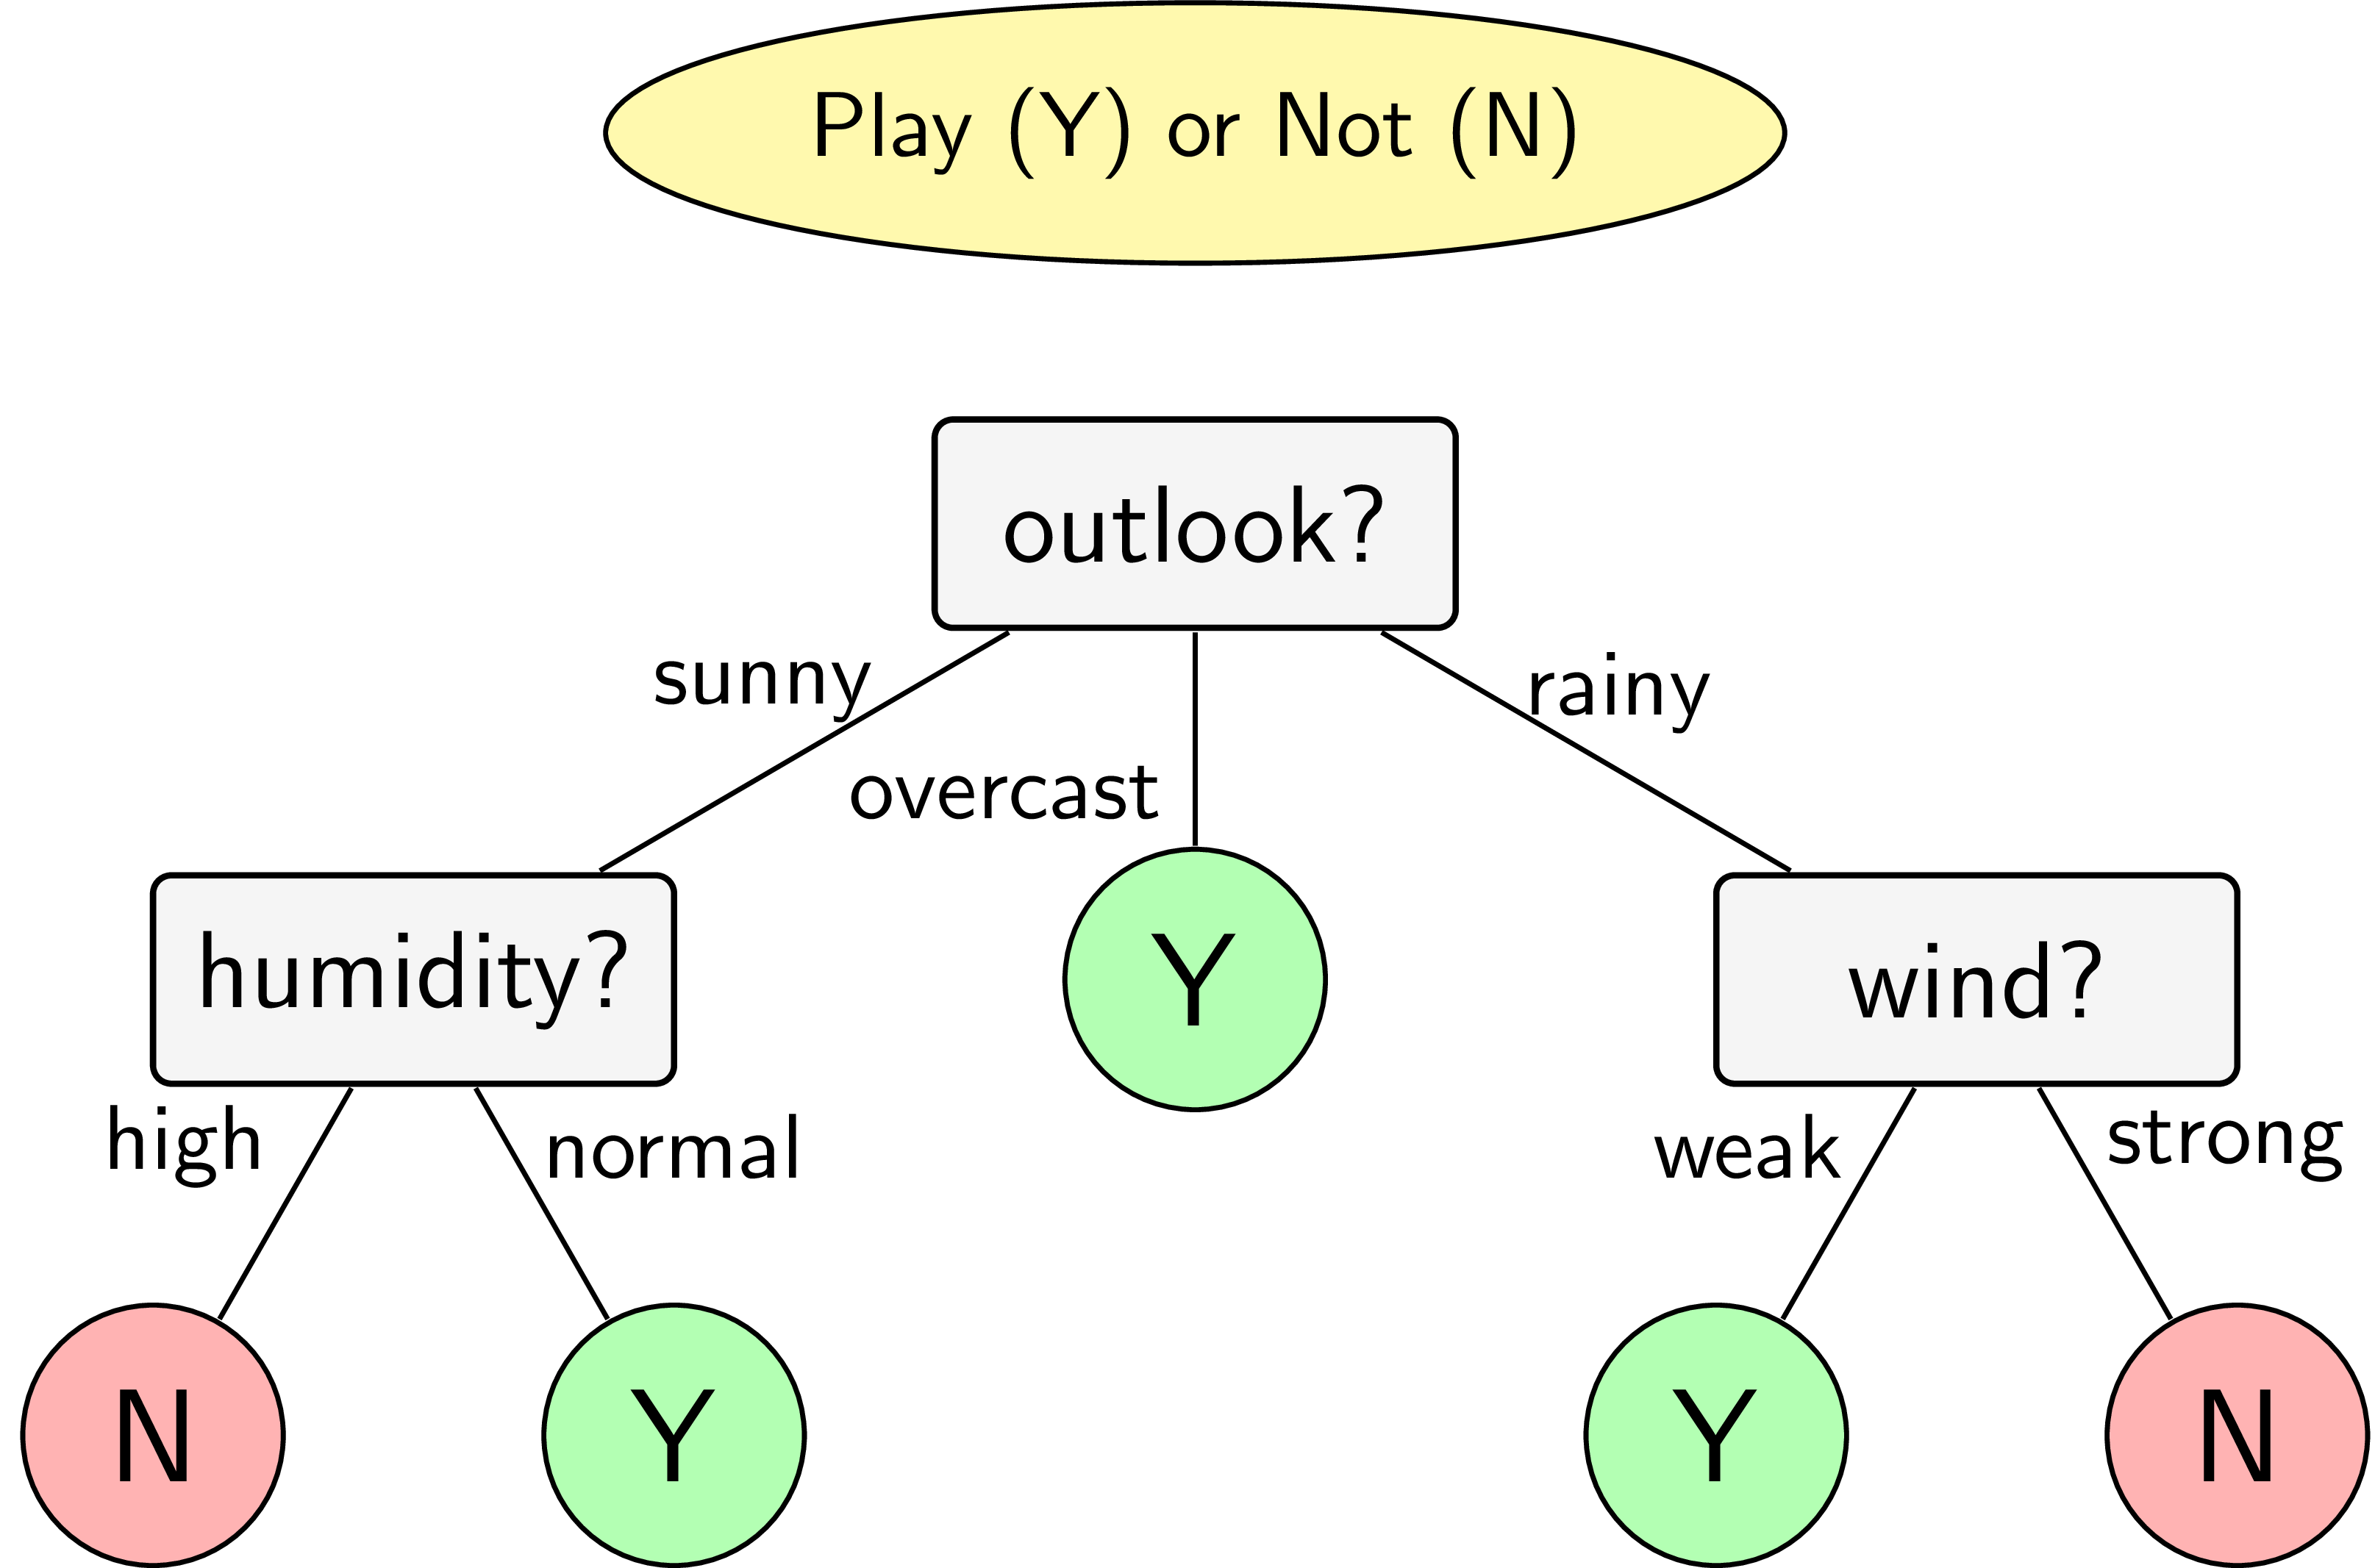